In [98]:
#Caculate how many smart contract opcode in the folder and SSLOAD and SSTore
import os
from collections import Counter
import matplotlib.pyplot as plt 

In [91]:
count1 = 0    #Caculate number of smart contract opcode
for filename in os.listdir('/Users/Gabriel/Desktop/opcode'):
    #print filename
    count1 += 1
print (count1)

16603


In [92]:
count_sc = 0    #Caculate number of smart contract opcode
Name2Stat = {}
for filename in os.listdir('/Users/Gabriel/Desktop/opcode'):
    with open('/Users/Gabriel/Desktop/opcode/' + filename) as f:
        content = f.readlines()
        content = [x.strip() for x in content]
        counter = Counter(content)
        Name2Stat[filename] = [counter['SSTORE'], counter['SLOAD'], counter['BALANCE']]
        count_sc += 1
print(count_sc)

16603


In [95]:
total = len(Name2Stat)
stat_S = sum([1 for x in Name2Stat.values() if x[0]!=0])
stat_L = sum([1 for x in Name2Stat.values() if x[1]!=0])
stat_B = sum([1 for x in Name2Stat.values() if x[2]!=0])
stat_SL = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[1]!=0)])
stat_SB = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[2]!=0)])
stat_LB = sum([1 for x in Name2Stat.values() if (x[1]!=0 and x[2]!=0)])
stat_SLB = sum([1 for x in Name2Stat.values() if (x[0]!=0 and x[1]!=0 and x[2]!=0)])

In [99]:
num_list = [stat_S,stat_L,stat_B,stat_SL,stat_SB,stat_LB,stat_SLB]
num_list

[15795, 16286, 3698, 15792, 3538, 3648, 3536]

In [100]:
dict = {'S':stat_S/count_sc, 'L': stat_L/count_sc, 'B': stat_B/count_sc,'S&L': stat_SL/count_sc, 'S&B': stat_SB/count_sc,'L&B': stat_LB/count_sc,'S&L&B': stat_SLB/count_sc}
dict

{'B': 0.22273083177738962,
 'L': 0.9809070649882551,
 'L&B': 0.21971932783231946,
 'S': 0.9513340962476661,
 'S&B': 0.2130940191531651,
 'S&L': 0.9511534060109619,
 'S&L&B': 0.21297355899536227}

In [52]:
Name2Stat

{'0x62cd07d414ec50b68c7ecaa863a23d344f2d062f': [7, 0, 0],
 '0xcb866b3e8bf16c792ec451a7e7090a78f3a09dad': [18, 0, 0],
 '0xf3c700fd2b484fea0dc752785e7031db68f59e64': [12, 0, 0],
 '0xcd05538c4e6e8cb1d4f909d9c9db6f479764f834': [9, 0, 0],
 '0xea0c348a297084bffbddad7f89216f24a2106e58': [27, 0, 1],
 '0x6085df4802721d24e39f69721b294a831cb2bd10': [6, 0, 2],
 '0x47e424309eeddb59c535066652f819b2361d48c0': [6, 0, 0],
 '0x0fefe1a94a3033dc67206275de590776bfad3574': [7, 0, 0],
 '0x795a9bfa0b30b92efe663cbfbec1656b6378748e': [6, 0, 0],
 '0xad01fab133e6b9a3308a68931f768ec86e1ad281': [64, 0, 0],
 '0x584bf48227509f93ae7c7f2ac2e3e4364d58050b': [20, 0, 0],
 '0xff3212bdda5e2a00d4015599654169e4643b96a8': [2, 0, 0],
 '0xcc2ae7ad8f32ea3bd38d0192d20e465503ae698d': [9, 0, 0],
 '0x51a1421116f4d35d2952343b9dd66b3371e48b64': [7, 0, 0],
 '0x4AB274FC3A81B300A0016b3805d9b94C81FA54d2': [3, 0, 0],
 '0x3e84512f277A5081B9209831C51bCe665035D9DB': [26, 0, 2],
 '0x62bbdf696adc2d90d8ed1c7d7f9322b4687788d7': [7, 0, 0],
 '0xd8c3

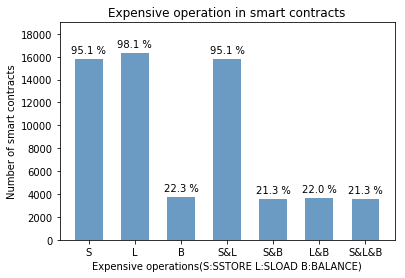

In [160]:
plt.title('Expensive operation in smart contracts')
plt.xlabel('Expensive operations(S:SSTORE L:SLOAD B:BALANCE)')
plt.ylabel('Number of smart contracts')
plt.xticks(range(7),['S','L','B','S&L','S&B','L&B','S&L&B'])
plt.ylim([0,19000])
plt.yticks([0, 2000, 4000, 6000, 8000, 10000, 12000, 14000, 16000, 18000])
def to_percent(y, count1):
    return str(100 * y) + '%'
for x,y in enumerate(num_list):
    plt.text(x,y-500,'%0.1f %%\n' %(y/count1*100),ha='center')
plt.bar(range(7),num_list , align = 'center',color='steelblue', width = 0.6, alpha = 0.8) 
plt.show()  